Imagine you have been asked to write a report summarizing your statistical analysis of the project data.  This report might be submitted to an office that manages/regulates this area, people who work in the industry who might be looking to invest in new ideas, or the media. 


 In this synthesis activity for Unit 4 your focus is to use Google Colaboratory to communicate your results.  While this task could be accomplished using a word doc, you are required to use the colab notebook (assignemnts submitted in any other format will receive a zero!)

To successfully complete the report of your statistical analysis adhere to the sections outlined below

Goals
* Appropriate headings, the main title, then an 'Introduction', 'Analysis', 'Results', 'Discussion' and 'Code'
* The introduction should contain your question and a brief description of the data
* The analysis  should contain the results of the EDA and inferential models, along with any steps you took  to select or convert the observations or variables in preparation of your model  This must contain at least one table created with markdown
*  The results should contain the results of your inferential model
* The discussion should describe the results of the model in non-technical terms in a manner that conveys meaning to answer your question of interest
* The code should contain the complete code to replicate your analysis including the appropriate comments

Task 1:  Use the heading 'Introduction' and write an introduction containing your question and a brief description of the data



---

# Introduction
<br>
Coffee is among the most consumed beverages in the world, between being served with meals in some cultures to becoming part of one's morning ritual. Frequent consumers typically develop a preference for particular qualities, which are then are sought after by farmers. There are several growing conditions in which coffee is yielded from all over the world. But can the same qualities of coffee be grown from anywhere in the world, or does location and altitude affect these quality measurements? In our analysis, we aim to evaluate this question using reviews gathered from the Coffee Quality Institute by Data Scientist James LeDoux.


---




Task 2: Use the heading 'Analysis' and write the results of the EDA and inferential models, along with any steps you took to select or convert the observations or variables in preparation of your model.  This must contain at least one table created with markdown



---

# Analysis
<br>
Our original data set is comprised of 43 variables and 1339 total observations covering the locational and quality measurements for two types of coffee strains: Arabica and Robusta. Of the 1339 total observations, 911 are complete observations (meaning there are no missing values for any of the captured metrics).

###<center>Univariate Descriptive Statistics<center/>


 Variable | N | M(SD)
--- | --- | ---
total_cup_points | 911 | 81.97(3.76)
number_of_bags	|911| 160.01(129.63)
aroma	|911|7.55(0.39)
flavor |911|7.50(0.40)
aftertaste	|911|7.37(0.41)
acidity	|911|7.51(0.39)
body |911|7.49(0.36)
balance |911|7.48(0.42)
uniformity|911|9.86(0.55)
sweetness|911|9.92(0.55)
moisture|911|0.10(0.04)
category_one_defects|911|0.42(2.03)
category_two_defects|911|3.80(5.57)
altitude_low_meters|911|1845.91(9560.79)
altitude_high_meters|911|1881.07(9559.38)
altitude_mean_meters|911|1863.49(9559.88)

<br>
For our analysis, we utilized a subset of the original data set containing 23 of the 43 variables and all of the complete observations. The subset contains: total_cup_points, species, country_of_origin, altitude, region, number_of_bags, bag_weight, variety, aroma, flavor, aftertaste, acidity, body, balance, uniformity, sweetness, moisture, category_one_defects, color, category_two_defects, altitude_low_meters, altitude_high_meters, altitude_mean_meters.The above table contains the univariate descriptive statistics for the numeric variables in our subset. Outliers were removed below the 0.01 quantile and above the 0.99 quantile.
<br>
<br>
As our research focus is on whether the quality of coffee differs from different regions and/ or altitudes, we focus our analysis on the variables total_cup_points, altitude_low_meters, altitude_high_meters, altitude_mean_meters, and region. 'total_cup_points' is defined as the sum of each observation's quality measures minus its category one and two defects, so it can be reasoned that a higher total_cup_points value indicates an overall higher quality of coffee. For simplicity, we chose this as our repsonse. We will construct an Ordinary Least Squares model and a type III One-Way ANOVA model to evaluate our hypothesis.  

---




Task 3:  Use the heading 'Results' and write the results of your inferential model



---

# Results
<br>
Using total_cup_points as our response with altitude_low_meters, altitude_high_meters, altitude_mean_meters, and region as our predictors, our initial Ordinary Least Squares regression model yielded inconclusive results. No predictors were found to be statistically significant and the results were mirrored by our One-Way ANOVA model. The residual analysis identified significant deviations from our error normality assumption, likely causing our weak model.
<br>
We applied a box-cox transformation to our response, total_cup_points, to correct for the normality violation. Box-cox transformations apply an "optimized" modifier, lambda, to the response value such that the transformed response values take on the form:

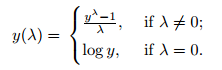

<br>
After the transformation was applied, and saved as a new variable 'total_cup_points_BC', we reconstructed our OLS model and One-Way ANOVA model with the new response to evaluate the updated results. With these models, the normality assumption was corrected, though not perfectly, and we were able to identify 'region' as a significant predictor. From our OLS model, we were able to identify 109 significant regions in terms of predicting coffee quality. Our altitude predictors did not indicate significance in any of our models.
<br>

---




Task 4:  Use the heading 'Discussion' and describe the results of the model in non-technical terms in a manner that conveys meaning to answer your question of interest



---

# Discussion

<br>
From our analysis, we were able to identify that region does indeed influence a coffee's quality, while altitude does not appear to alter the cup's quality. What this implies is that there are indeed certain regions in which coffee production and the quality of production thrive at a threshold that cannot be replicated in other areas. This could be due to extraneous factors not included in this study, such as regional soil quality, different cultural farming practices, length of sunlight each day due to its proximity to the equator, etc. One could expand upon this analysis by evaluating more specific models using individual quality measures to see how minutely region and/ or altitude affects quality, subsetting the dataset to include the high-production countries to evaluate, or conducting non-parametric tests to evaluate our hypothesis, to name a few.
<br>
<br>
Addressing the limitations of our model, while additional tranformations improved the results, we still operated with an error normality violation, which may have skewed the results. If one were looking to reevlaute the results, a larger study could be conducted such that there are enough observations to fine tune the model requirements for one to rule out any model deviations affecting the results.

---




Taks 5: Use the heading 'Code' containing the complete code to replicate your analysis including the appropriate comments



---

# Code



---




In [1]:
#downloading data
!gdown 1dtO6gDyPemdP4TABdx-q7VVNw4gxKCDX
#importing libraries
import gdown 
import pandas as pd
import numpy as np
#loading into a dataframe
Coffee = pd.read_csv('/content/coffee_ratings.csv')
Coffee.head()

Downloading...
From: https://drive.google.com/uc?id=1dtO6gDyPemdP4TABdx-q7VVNw4gxKCDX
To: /content/coffee_ratings.csv
100% 604k/604k [00:00<00:00, 81.9MB/s]


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [2]:
#EDA
Coffee.isna().sum() #noticing many missing in the lot_number and ico_number columns

total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers                     1
color     

In [3]:
Coffee.duplicated().sum() #no duplicated rows

0

In [4]:
Coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [5]:
Coffee.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,82.089851,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,3.500575,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.080000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [6]:
Coffee['country_of_origin'].unique() #since we're looking at potential altitude/ country differences, this could be important

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [7]:
Coffee['altitude'].unique() #there's a huge variety here

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

In [8]:
pd.crosstab(Coffee['country_of_origin'],Coffee['species'], dropna=False) #236 Arabica in Mexico!

species,Arabica,Robusta
country_of_origin,,
Brazil,132,0
Burundi,2,0
China,16,0
Colombia,183,0
Costa Rica,51,0
Cote d?Ivoire,1,0
Ecuador,1,2
El Salvador,21,0
Ethiopia,44,0


In [9]:
#first subset
Coffee_sub = Coffee[['total_cup_points','species','country_of_origin','altitude','region','number_of_bags','bag_weight','variety','aroma','flavor','aftertaste','acidity','body','balance','uniformity','clean_cup','sweetness','cupper_points','moisture','category_one_defects','color','category_two_defects','altitude_low_meters','altitude_high_meters','altitude_mean_meters']]

In [10]:
Coffee_sub = Coffee_sub[['total_cup_points','species','country_of_origin','altitude','region','number_of_bags','bag_weight','variety','aroma','flavor','aftertaste','acidity','body','balance','uniformity','sweetness','moisture','category_one_defects','color','category_two_defects','altitude_low_meters','altitude_high_meters','altitude_mean_meters']]
#the above line is subsetted further from the final data set in part 1. To test differences in coffee compared to each region, I left species, quality attributes, volumes, and location variables to move forward with the analysis.

In [11]:
#Using describe to generate descriptive statistics
Coffee_sub.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,moisture,category_one_defects,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,82.089851,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.856692,0.088379,0.479462,3.556385,1750.713315,1799.347775,1775.030545
std,3.500575,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.616102,0.048287,2.549683,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.080000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,0.090000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.500000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,0.110000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,83.670000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,0.120000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,90.580000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,0.280000,63.000000,55.000000,190164.000000,190164.000000,190164.000000


In [12]:
#Using corr to get the bivariate correlation
Coffee_sub.corr()

<ipython-input-12-ef70786c7ad3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Coffee_sub.corr()


,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,moisture,category_one_defects,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
total_cup_points,1.000000,0.020226,0.791627,0.874279,0.860656,0.797024,0.757165,0.828502,0.656454,0.554029,-0.117722,-0.130009,-0.211085,-0.014439,-0.013102,-0.013771
number_of_bags,0.020226,1.000000,-0.007040,0.002094,0.000473,0.029384,0.032897,0.032402,0.025492,0.002071,-0.053701,-0.079895,-0.001113,-0.025910,-0.026154,-0.026033
aroma,0.791627,-0.007040,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.253493,-0.134127,-0.096352,-0.149024,-0.015680,-0.014786,-0.015234
flavor,0.874279,0.002094,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.291065,-0.145201,-0.088792,-0.191956,-0.011503,-0.010250,-0.010877
aftertaste,0.860656,0.000473,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.266409,-0.180510,-0.104721,-0.210016,-0.022862,-0.021363,-0.022114
acidity,0.797024,0.029384,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.261854,-0.129079,-0.084269,-0.136814,0.001188,0.002427,0.001807
body,0.757165,0.032897,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.268342,-0.147651,-0.044519,-0.085386,-0.013602,-0.011983,-0.012793
balance,0.828502,0.032402,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.283272,-0.199843,-0.082406,-0.171100,-0.013014,-0.011128,-0.012072
uniformity,0.656454,0.025492,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.451083,0.013792,-0.105890,-0.145833,-0.010379,-0.009632,-0.010006
sweetness,0.554029,0.002071,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,1.000000,0.072699,-0.150810,-0.024998,-0.011338,-0.010797,-0.011068


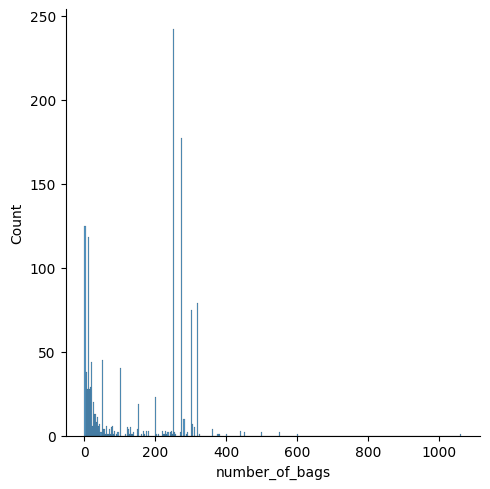

In [13]:
#Let's start with some displots
import seaborn as sns
sns.displot(Coffee_sub, x="number_of_bags", binwidth=3)

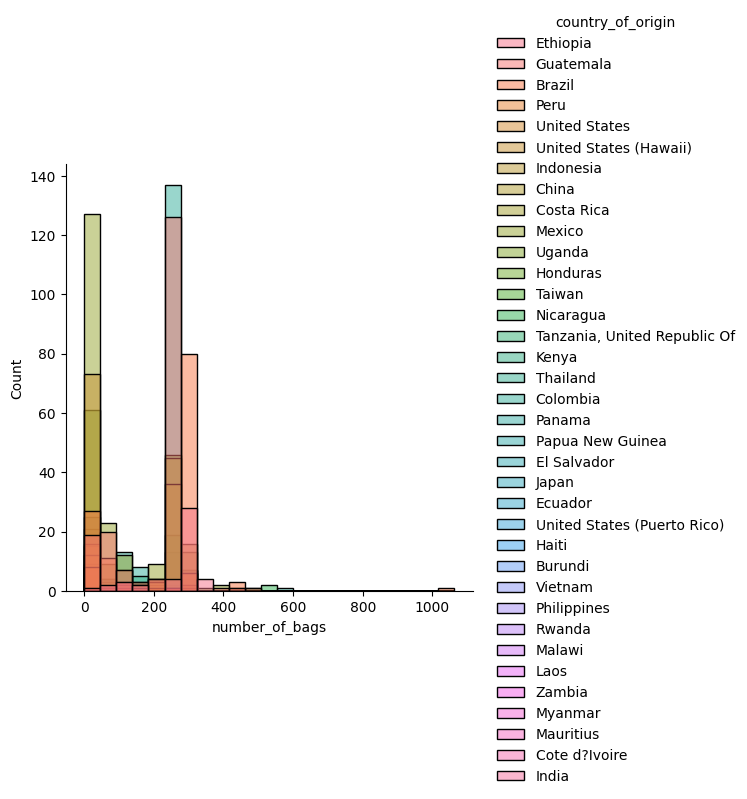

In [14]:
sns.displot(Coffee_sub, x="number_of_bags", hue="country_of_origin")
#This shows the relationship between the quantity of beans coming out of each country, just an interesting visual

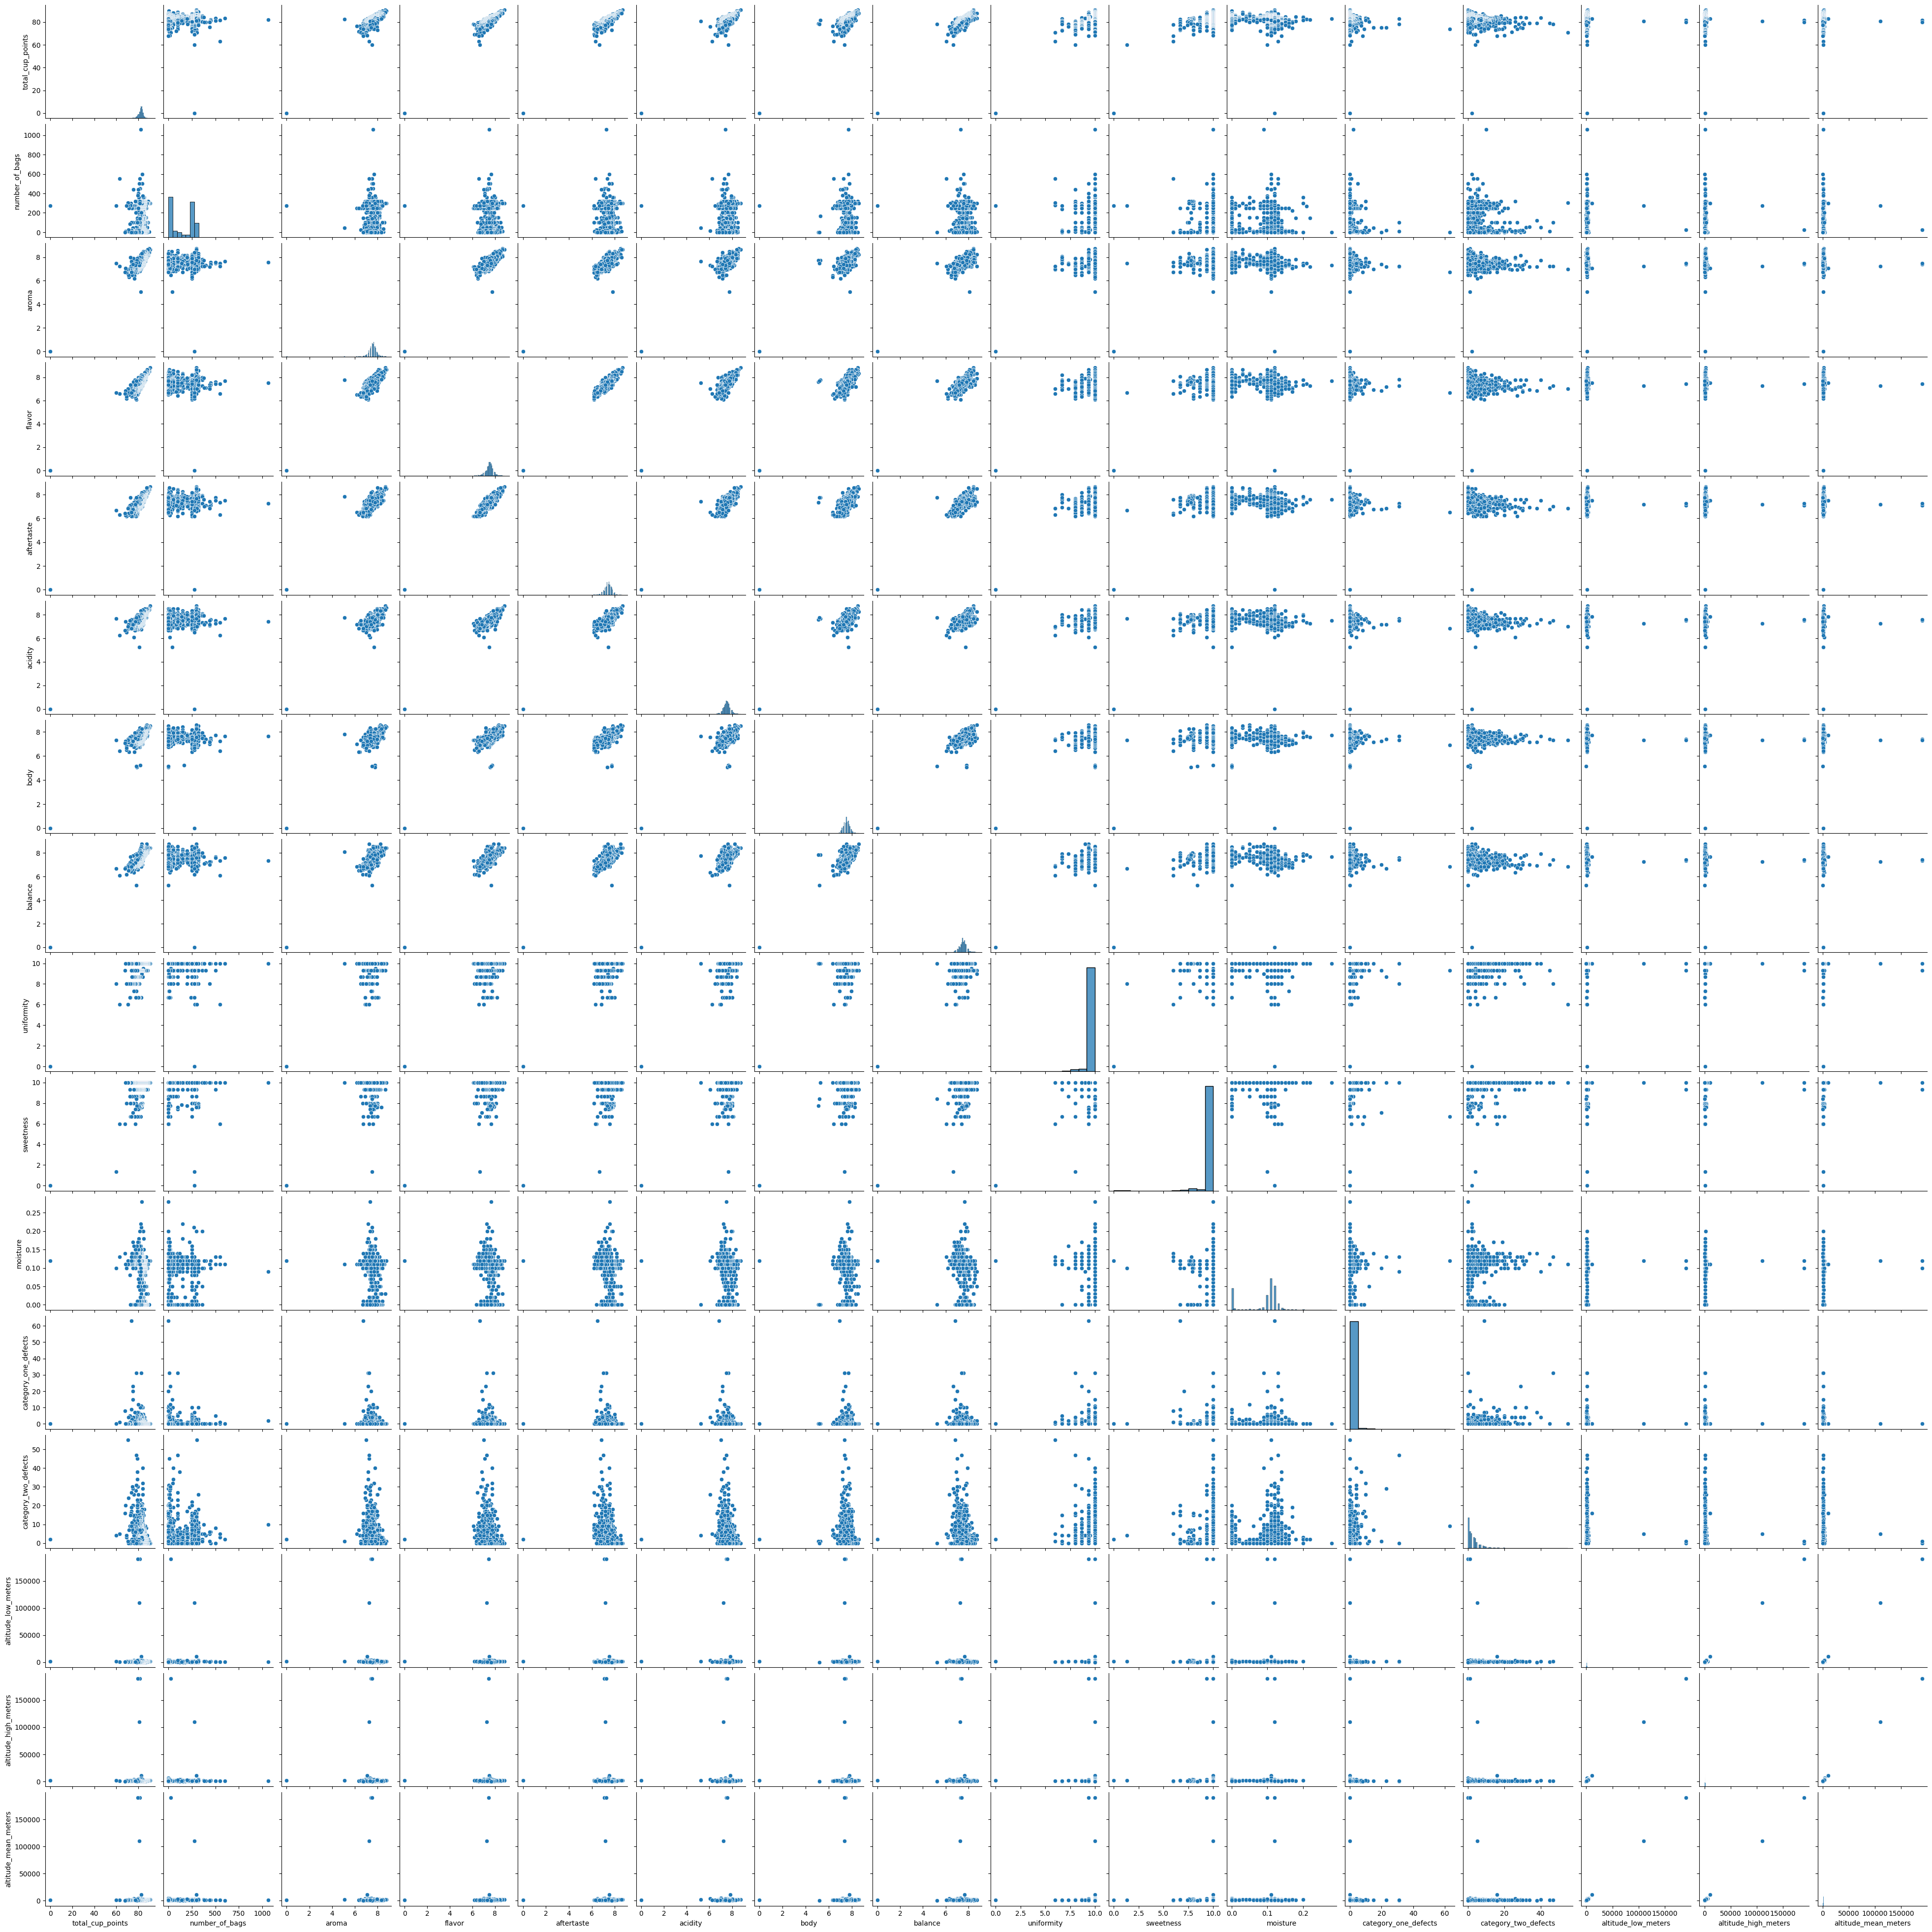

In [15]:
#Pairplots of the data set
sns.pairplot(data = Coffee_sub)
#this massive plot shows the relationships between all numeric variables in the data set. Interestingly, we don't see any plots with uniform data poitns which indicates that there is some sort of relationship between each on of the numeric variables

<ipython-input-16-55ced50eec39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = Coffee_sub.corr())


<Axes: >

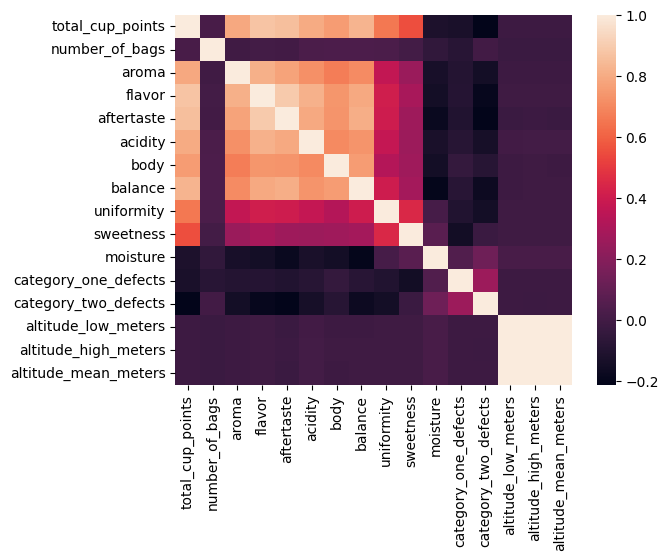

In [16]:
#We can further explain the relationships in a correlation plot 
sns.heatmap(data = Coffee_sub.corr())
#In the below, we note some interesting relationships. Obviously, we see that there is a negative relationship between the defect categories and the quality variables (a "better" cup of coffee would have less reported defects).
#Another relationship we see is that most of the quality measures have a positive relationship. From this, it seems like a higher quality cup of coffee has more highly rated attributes all around.

In [19]:
#Let's look at the missing values
Coffee_sub.isna().sum()
#We see that country_of_origin, altitude, region, variety, and color are the only variables with missing values.

total_cup_points          0
species                   0
country_of_origin         1
altitude                226
region                   59
number_of_bags            0
bag_weight                0
variety                 226
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
sweetness                 0
moisture                  0
category_one_defects      0
color                   218
category_two_defects      0
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
dtype: int64

In [18]:
#Since we have 1339 observations and 226 minimum rows with N/A values, I think it's safe to remove these observations without substantially effecting the analysis going forward.
Coffee_sub2 = Coffee_sub.dropna()

In [20]:
#Let's check this new data frame just to be sure:
Coffee_sub2.info()
#we clearly don't have any missing observations in this, but it did shave off 428 observations from the total data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 1 to 1333
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cup_points      911 non-null    float64
 1   species               911 non-null    object 
 2   country_of_origin     911 non-null    object 
 3   altitude              911 non-null    object 
 4   region                911 non-null    object 
 5   number_of_bags        911 non-null    int64  
 6   bag_weight            911 non-null    object 
 7   variety               911 non-null    object 
 8   aroma                 911 non-null    float64
 9   flavor                911 non-null    float64
 10  aftertaste            911 non-null    float64
 11  acidity               911 non-null    float64
 12  body                  911 non-null    float64
 13  balance               911 non-null    float64
 14  uniformity            911 non-null    float64
 15  sweetness             

In [21]:
Coffee_sub2.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,sweetness,moisture,category_one_defects,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,81.971087,160.013172,7.551943,7.497706,7.368694,7.508288,7.487058,7.481921,9.861515,9.920044,0.097464,0.420417,3.802415,1845.908479,1881.067838,1863.488159
std,3.758820,129.625945,0.385984,0.396666,0.405162,0.388523,0.363071,0.415896,0.547576,0.545161,0.041205,2.027281,5.569189,9560.792269,9559.378705,9559.884832
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.170000,20.000000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,0.100000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.420000,200.000000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,0.110000,0.000000,2.000000,1310.640000,1310.640000,1310.640000
75%,83.500000,275.000000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,0.120000,0.000000,5.000000,1550.000000,1600.000000,1600.000000
max,89.920000,1062.000000,8.750000,8.670000,8.500000,8.580000,8.420000,8.580000,10.000000,10.000000,0.170000,31.000000,47.000000,190164.000000,190164.000000,190164.000000


In [22]:
#Modeling section
#Libraries
import statsmodels.api as smapi
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import matplotlib.pyplot as plt

In [26]:
#Since our research question is "Are there significant differences in coffees grown at different altitudes and/or different counties?", we're going to look first at "total_cup_points" as it is the 
#We're using total_cup_points as our response as it is the sum of quality measures for a particular observation
#OLS model
model = smf.ols(formula='total_cup_points ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + region', data=Coffee_sub2)
#since country of origin is far too many unique values to be helpful, we kept the region variable instead

In [27]:
Fit_model = model.fit()
Fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_cup_points   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.7671
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.995
Time:                        02:27:14   Log-Likelihood:                -2361.2
No. Observations:                 911   AIC:                             5296.
Df Residuals:                     624   BIC:                             6678.
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         85.0681      2.254     37.735      0.000      80.641      89.495
region[T.aceh]                                                                    -2.6733      4.512     -0.592      0.554     -11.535       6.188
region[T.ada okinawa japan]                                                       -0.3968      4.509     -0.088      0.930      -9.251       8.457
region[T.adolfo lopez mateos]                                                     -4.0600      4.508     -0.901      0.368     -12.914       4.794
region[T.aldea xeucalvitz, ixil region, quiche department]                        -0.9767      4.508     -0.217      0.829      -9.830       7.877
region[T.alta paulista (sao paulo)]                                               -3.9830      4.508     -0.883      0.377     -12.837       4.871
region[T.altotonga]                                                               -2.8907      4.508     -0.641      0.522     -11.744       5.963
region[T.amatenango de la frontera]                                               -4.8121      3.564     -1.350      0.177     -11.812       2.187
region[T.antigua]                                                                 -2.1035      2.484     -0.847      0.397      -6.982       2.775
region[T.antioquia]                                                               -1.2444      2.982     -0.417      0.677      -7.101       4.612
region[T.apaneca]                                                                 -1.6633      2.694     -0.617      0.537      -6.954       3.628
region[T.arusha]                                                                  -2.6751      2.851     -0.938      0.349      -8.275       2.924
region[T.arusha meru]                                                             -2.6313      4.508     -0.584      0.560     -11.485       6.222
region[T.asia pacific]                                                            -2.1363      4.508     -0.474      0.636     -10.990       6.717
region[T.ataco, apaneca - ilamatepec mountain range]                               0.3274      4.512      0.073      0.942      -8.534       9.189
region[T.atitlan]                                                                 -2.1599      2.982     -0.724      0.469      -8.016       3.696
region[T.atoyac de alvarez]                                                       -2.8096      3.564     -0.788      0.431      -9.809       4.190
region[T.baihe dist., tainan city 臺南市白河區]                                         -5.7025      4.524     -1.260      0.208     -14.587       3.

In [28]:
#Now a Type III One-Way ANOVA model
smapi.stats.anova_lm(Fit_model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,21707.738564,1.0,1423.953992,3.535682e-163
region,3273.192765,284.0,0.756022,9.965084e-01
altitude_low_meters,16.156931,1.0,1.059840,3.036506e-01
altitude_high_meters,16.073772,1.0,1.054385,3.048972e-01
altitude_mean_meters,4.250983,1.0,0.278850,5.976436e-01
Residual,9512.687163,624.0,NaN,NaN


In [30]:
#Checking Assumptions
#Anderson Darling test for normality
stats.diagnostic.normal_ad(Fit_model.resid_pearson)
#AD test stat = 102.45, p-value = approx 0.0
#We have a violation of the normality assumption

(102.4489911346983, 0.0)

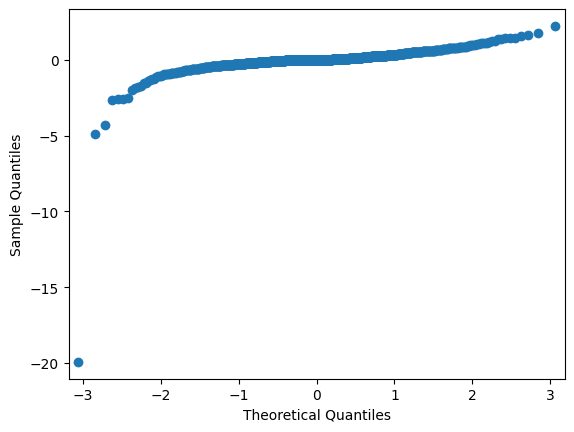

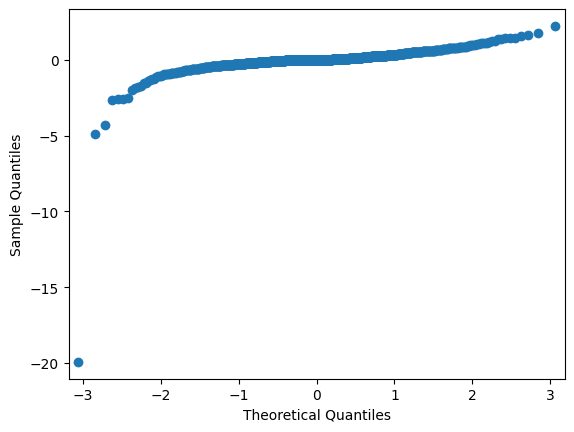

In [31]:
#Normal probability plot
smapi.qqplot(Fit_model.resid_pearson)
#We can clearly see the violation in the figures below

In [32]:
#Breusch-Pagan test for equal variance
stats.diagnostic.het_breuschpagan(Fit_model.resid_pearson, Fit_model.model.exog)
#the p-values here are large enough that we don't have evidence of an equal variance violation 

(60.00741705904399, 1.0, 0.15385007602640008, 0.9999999999999999)

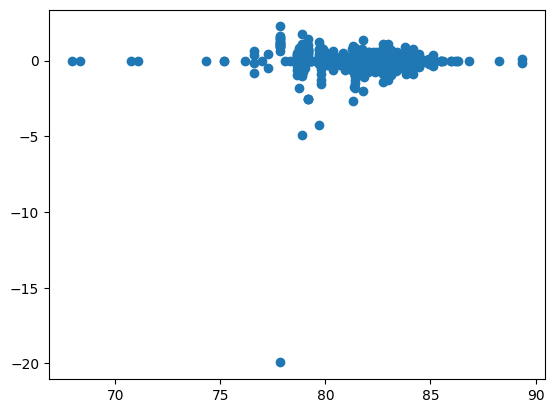

In [33]:
#residual plot
plt.scatter(Fit_model.fittedvalues, Fit_model.resid_pearson)
#barring the outlier, it does appear to be a random spread

In [34]:
#The Anderson Darling test yields the test statistic of 104.46 and a p-value = 0.0. Testing at the 0.05 significance level, we reject the null hypothesis as there is sufficient evidence the errors are non-normal. 
#The Breusch-Pagan test for equal error varaince yields the lagrange multiplier of 60.19 and the corresponding p-value = 1.0 so we fail to reject the null, at significance level 0.05, as there is in sufficient evidence of heteroscedasticity. The normality deviation will need to be remedied.

In [35]:
#Remediation
#Box-Cox transformation to fix (lack of) normality
from scipy import stats as bc
Coffee_sub2['total_cup_points_BC'], _ = bc.boxcox(Coffee_sub2['total_cup_points'] + .0001) #the 0.0001 addition helps it so that we don't encounter log(0) transformation errors

<ipython-input-35-cfad3720d5a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coffee_sub2['total_cup_points_BC'], _ = bc.boxcox(Coffee_sub2['total_cup_points'] + .0001) #the 0.0001 addition helps it so that we don't encounter log(0) transformation errors


<Axes: >

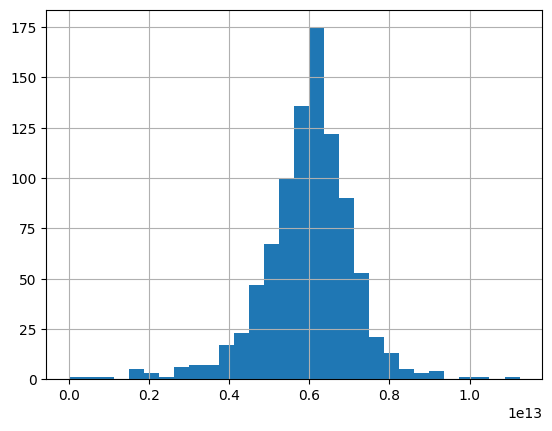

In [36]:
Coffee_sub2['total_cup_points_BC'].hist(bins = 30)
#histogram of our transformed response

<Axes: >

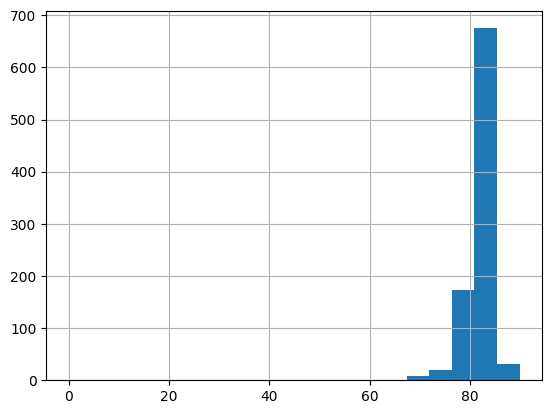

In [37]:
#let's compare with what we had before
Coffee_sub2['total_cup_points'].hist(bins = 20)

In [38]:
#rechecking the model with this transformation
model2 = smf.ols(formula='total_cup_points_BC ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + region', data=Coffee_sub2)
Fit_model2 = model2.fit()
Fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_cup_points_BC   R-squared:                       0.528
Model:                             OLS   Adj. R-squared:                  0.311
Method:                  Least Squares   F-statistic:                     2.438
Date:                 Thu, 27 Apr 2023   Prob (F-statistic):           1.86e-20
Time:                         02:28:56   Log-Likelihood:                -26250.
No. Observations:                  911   AIC:                         5.307e+04
Df Residuals:                      624   BIC:                         5.446e+04
Df Model:                          286                                         
Covariance Type:             nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       7.585e+12   5.51e+11     13.760      0.000     6.5e+12    8.67e+12
region[T.aceh]                                                                 -1.509e+12    1.1e+12     -1.368      0.172   -3.68e+12    6.57e+11
region[T.ada okinawa japan]                                                     -2.54e+11    1.1e+12     -0.230      0.818   -2.42e+12    1.91e+12
region[T.adolfo lopez mateos]                                                  -2.233e+12    1.1e+12     -2.025      0.043    -4.4e+12   -6.77e+10
region[T.aldea xeucalvitz, ixil region, quiche department]                     -6.042e+11    1.1e+12     -0.548      0.584   -2.77e+12    1.56e+12
region[T.alta paulista (sao paulo)]                                            -2.197e+12    1.1e+12     -1.992      0.047   -4.36e+12   -3.16e+10
region[T.altotonga]                                                            -1.658e+12    1.1e+12     -1.504      0.133   -3.82e+12    5.06e+11
region[T.amatenango de la frontera]                                             -2.55e+12   8.72e+11     -2.926      0.004   -4.26e+12   -8.38e+11
region[T.antigua]                                                              -1.231e+12   6.07e+11     -2.026      0.043   -2.42e+12   -3.78e+10
region[T.antioquia]                                                            -6.725e+11   7.29e+11     -0.922      0.357    -2.1e+12    7.59e+11
region[T.apaneca]                                                              -9.575e+11   6.59e+11     -1.453      0.147   -2.25e+12    3.36e+11
region[T.arusha]                                                                -1.51e+12   6.97e+11     -2.166      0.031   -2.88e+12   -1.41e+11
region[T.arusha meru]                                                          -1.524e+12    1.1e+12     -1.382      0.167   -3.69e+12    6.41e+11
region[T.asia pacific]                                                          -1.26e+12    1.1e+12     -1.143      0.253   -3.43e+12    9.04e+11
region[T.ataco, apaneca - ilamatepec mountain range]                            2.646e+11    1.1e+12      0.240      0.811    -1.9e+12    2.43e+12
region[T.atitlan]                                                              -1.266e+12   7.29e+11     -1.736      0.083    -2.7e+12    1.66e+11
region[T.atoyac de alvarez]                                                    -1.606e+12   8.72e+11     -1.843      0.066   -3.32e+12    1.06e+11
region[T.baihe dist., tainan city 臺南市白河區]                                      -2.926e+12   1.11e+12     -2.645      0.008    -5.1e+

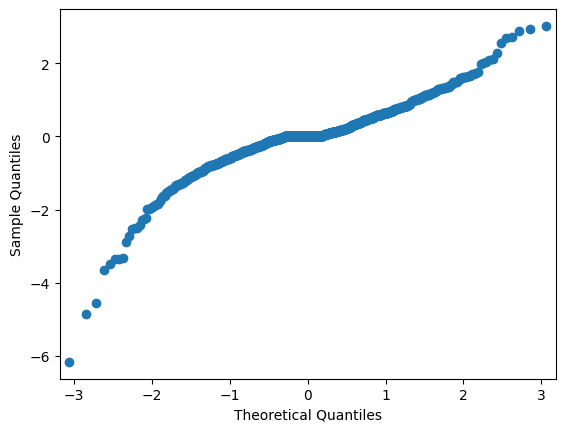

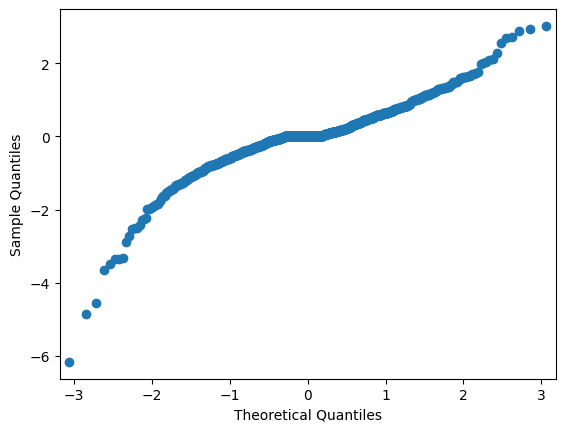

In [39]:
#rechecking normal probability plot
smapi.qqplot(Fit_model2.resid_pearson)
#it definitely looks better than it did, but we'll leave it up to the AD test to be sure

In [41]:
#Anderson Darling test
stats.diagnostic.normal_ad(Fit_model2.resid_pearson)
#it's definitely less bad now (with test stat = 24.35 and p-value = approx 0.0) but still not great

(24.351850549074697, 0.0)

In [42]:
#Since we're still having an issue, and we can clearly see that there are a couple outliers in our system, let's see if removing those will help
q_low = Coffee_sub2["total_cup_points"].quantile(0.01)
q_hi  = Coffee_sub2["total_cup_points"].quantile(0.99)
Coffee_sub3 = Coffee_sub2
Coffee_sub3 = Coffee_sub2[(Coffee_sub2["total_cup_points"] < q_hi) & (Coffee_sub2["total_cup_points"] > q_low)].copy()
Coffee_sub3['total_cup_points_BC'], _ = bc.boxcox(Coffee_sub3['total_cup_points'] + .0001)

In [44]:
#model recheck
model3 = smf.ols(formula='total_cup_points_BC ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + region', data=Coffee_sub2)
Fit_model3 = model3.fit()
Fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_cup_points_BC   R-squared:                       0.528
Model:                             OLS   Adj. R-squared:                  0.311
Method:                  Least Squares   F-statistic:                     2.438
Date:                 Thu, 27 Apr 2023   Prob (F-statistic):           1.86e-20
Time:                         02:29:45   Log-Likelihood:                -26250.
No. Observations:                  911   AIC:                         5.307e+04
Df Residuals:                      624   BIC:                         5.446e+04
Df Model:                          286                                         
Covariance Type:             nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       7.585e+12   5.51e+11     13.760      0.000     6.5e+12    8.67e+12
region[T.aceh]                                                                 -1.509e+12    1.1e+12     -1.368      0.172   -3.68e+12    6.57e+11
region[T.ada okinawa japan]                                                     -2.54e+11    1.1e+12     -0.230      0.818   -2.42e+12    1.91e+12
region[T.adolfo lopez mateos]                                                  -2.233e+12    1.1e+12     -2.025      0.043    -4.4e+12   -6.77e+10
region[T.aldea xeucalvitz, ixil region, quiche department]                     -6.042e+11    1.1e+12     -0.548      0.584   -2.77e+12    1.56e+12
region[T.alta paulista (sao paulo)]                                            -2.197e+12    1.1e+12     -1.992      0.047   -4.36e+12   -3.16e+10
region[T.altotonga]                                                            -1.658e+12    1.1e+12     -1.504      0.133   -3.82e+12    5.06e+11
region[T.amatenango de la frontera]                                             -2.55e+12   8.72e+11     -2.926      0.004   -4.26e+12   -8.38e+11
region[T.antigua]                                                              -1.231e+12   6.07e+11     -2.026      0.043   -2.42e+12   -3.78e+10
region[T.antioquia]                                                            -6.725e+11   7.29e+11     -0.922      0.357    -2.1e+12    7.59e+11
region[T.apaneca]                                                              -9.575e+11   6.59e+11     -1.453      0.147   -2.25e+12    3.36e+11
region[T.arusha]                                                                -1.51e+12   6.97e+11     -2.166      0.031   -2.88e+12   -1.41e+11
region[T.arusha meru]                                                          -1.524e+12    1.1e+12     -1.382      0.167   -3.69e+12    6.41e+11
region[T.asia pacific]                                                          -1.26e+12    1.1e+12     -1.143      0.253   -3.43e+12    9.04e+11
region[T.ataco, apaneca - ilamatepec mountain range]                            2.646e+11    1.1e+12      0.240      0.811    -1.9e+12    2.43e+12
region[T.atitlan]                                                              -1.266e+12   7.29e+11     -1.736      0.083    -2.7e+12    1.66e+11
region[T.atoyac de alvarez]                                                    -1.606e+12   8.72e+11     -1.843      0.066   -3.32e+12    1.06e+11
region[T.baihe dist., tainan city 臺南市白河區]                                      -2.926e+12   1.11e+12     -2.645      0.008    -5.1e+

In [45]:
#Last normality check
stats.diagnostic.normal_ad(Fit_model3.resid_pearson)
#unfortunately this didn't do anything to help our normality issue

(24.351850549074697, 0.0)

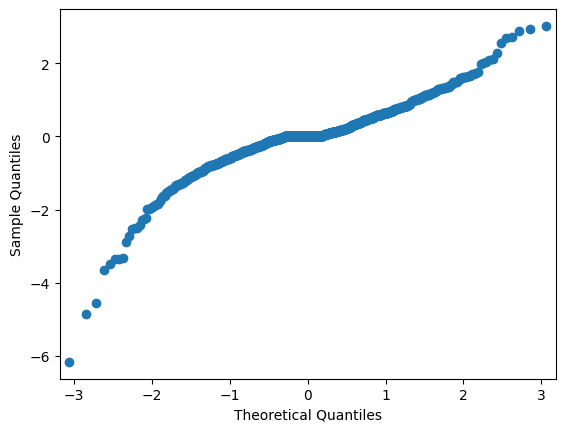

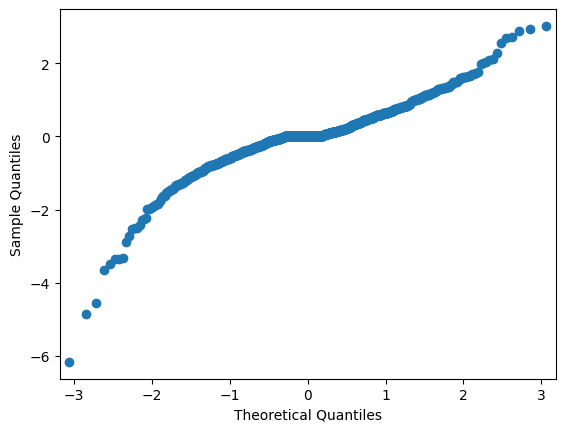

In [46]:
smapi.qqplot(Fit_model3.resid_pearson)

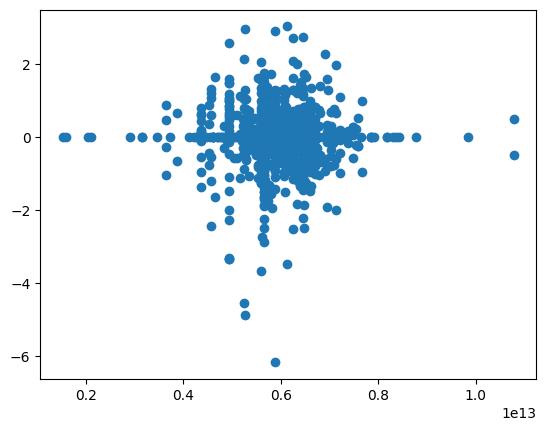

In [47]:
plt.scatter(Fit_model3.fittedvalues, Fit_model3.resid_pearson)
#it did help our variance plot though

In [48]:
#rechecking Breusch-Pagan test
stats.diagnostic.het_breuschpagan(Fit_model3.resid_pearson, Fit_model3.model.exog)
#it's still relatively the same

(173.6319087844772, 0.9999999836652601, 0.5137641024108821, 0.9999999998235859)

In [49]:
#One Way ANOVA
smapi.stats.anova_lm(Fit_model3, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,1.725668e+26,1.0,189.330432,8.179386e-38
region,6.211615e+26,284.0,2.399657,1.003147e-19
altitude_low_meters,1.837827e+24,1.0,2.016358,1.561113e-01
altitude_high_meters,1.822653e+24,1.0,1.999710,1.578280e-01
altitude_mean_meters,1.267161e+24,1.0,1.390256,2.388112e-01
Residual,5.687501e+26,624.0,NaN,NaN


In [55]:
#Overall, our model is ok but not great. We do have a glaring normality problem that affects the significance of the results. Looking at the OLS model table, we do even still have some predictor values that appear to be significant. 
#Approaching with scepticism, we do see that in our model so far, region and the intercept are considered significant predictors, with 109 significant values of 285 total values. Interestingly though, the altitude values were all deemed as insignificant predictors in our OLS model. 
#Referencing the One-Way ANOVA model output, we found similar results. As a whole, region was found to be significant predictors at the 0.05 significance level, while altitude_low_meters, altitude_high_meters, altitude_mean_meters were not found to be significant.

In [53]:
Coffee_sub2['region'].unique().size

285